# Neural Network- Forest Fire Data

Q: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [3]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load dataset
dataframe = pandas.read_csv("forestfires.csv")



# Encode Data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [3]:
print("Head:", dataframe.head())


Head:    X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:

print("Statistical Description:", dataframe.describe())


Statistical Description:                 X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
st

In [5]:

print("Shape:", dataframe.shape)


Shape: (517, 13)


In [6]:

print("Data Types:", dataframe.dtypes)


Data Types: X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [7]:

print("Correlation:", dataframe.corr(method='pearson'))

Correlation:               X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH'
 also a positive correlation, 'Rain' has the least correlation 

In [8]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]

In [9]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False False  True False False False  True  True False]
Feature Ranking:  [ 8  6  9  7  4  1  2  5  3  1  1 10]


'Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area'
 using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 
 'Area'


(array([ 508.,    6.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([    0.   ,   109.084,   218.168,   327.252,   436.336,   545.42 ,
          654.504,   763.588,   872.672,   981.756,  1090.84 ]),
 <a list of 10 Patch objects>)

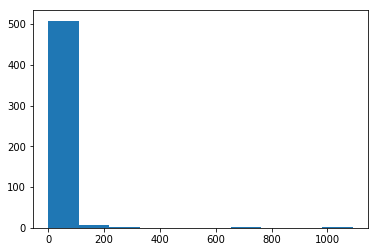

In [10]:
plt.hist((dataframe.area))

Most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd527a4cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdd520cacc0>]], dtype=object)

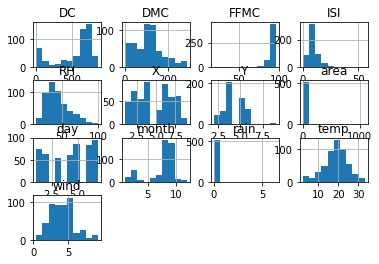

In [11]:
dataframe.hist()

'Temp' has a near Guassian Distribution. 
There are a mixture of positive skews and negative skews among the other attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd52064a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdd4aac2fd0>]], dtype=object)

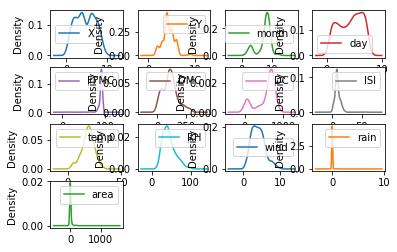

In [12]:
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)


X            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
month     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
day       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FFMC        AxesSubplot(0.125,0.518913;0.168478x0.16413)
DMC      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DC       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
ISI      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
temp        AxesSubplot(0.125,0.321957;0.168478x0.16413)
RH       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
wind     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
rain     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

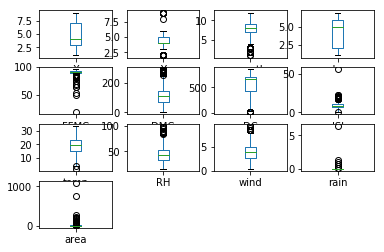

In [13]:

dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)


In [5]:
scatter_matrix(dataframe)

array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='FFMC', ylabel='month'>,
        <AxesSubplot:xlabel='DMC', ylabel='month'>,
        <AxesSubplot:xlabel='DC', ylabel='month'>,
        <AxesSubplot:xlabel='ISI', ylabel='month'>,
        <AxesSubplot:xlabel='temp', ylabel='month'>,
        <AxesSubplot:xlabel='RH', ylabel='month'>,
        <AxesSubplot:xlabel='wind', ylabel='month'>,
        <AxesSubplot:xlabel='rain', ylabel='month'>,
        <AxesSubplot:xlabel='area', ylabel='month'>,
        <AxesSubplot:xlabel='dayfri', ylabel='month'>,
        <AxesSubplot:xlabel='daymon', ylabel='month'>,
        <AxesSubplot:xlabel='daysat', ylabel='month'>,
        <AxesSubplot:xlabel='daysun', ylabel='month'>,
        <AxesSubplot:xlabel='daythu', ylabel='month'>,
        <AxesSubplot:xlabel='daytue', ylabel='month'>,
        <AxesSubplot:xlabel='daywed', ylabel='month'>,
        <AxesSubplot:xlabel='monthapr'

Error in callback <function flush_figures at 0x000001692A210430> (for post_execute):


KeyboardInterrupt: 

[Text(0,0,'X'),
 Text(0,0,'Y'),
 Text(0,0,'month'),
 Text(0,0,'day'),
 Text(0,0,'FFMC'),
 Text(0,0,'DMC'),
 Text(0,0,'DC'),
 Text(0,0,'ISI'),
 Text(0,0,'temp'),
 Text(0,0,'RH'),
 Text(0,0,'wind'),
 Text(0,0,'rain'),
 Text(0,0,'area')]

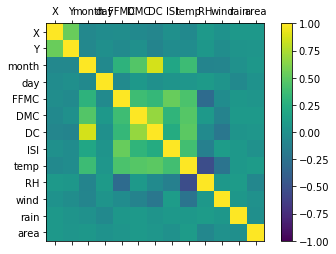

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

'cement' has the highest positive corelation as expected

In [16]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.023975 (19.309939)
Ridge: 0.023975 (19.307816)
Lasso: 0.023297 (19.054901)
ElasticNet: 0.023187 (19.055855)
Bag_Re: 0.847118 (8.047959)
RandomForest: 0.786759 (9.067032)
ExtraTreesRegressor: 0.999897 (0.096441)
KNN: 0.273047 (15.507250)
CART: 0.999897 (0.096441)
SVM: 0.005783 (11.987317)


'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', ey can be further explored and their hyperparameters tuned

In [17]:
Y = numpy.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [18]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)

kfold = KFold(n_splits=30, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.00 (0.01) MSE
